In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [296]:
MY_PC = '.'
MY_DRIVE = '/content/drive/MyDrive/KFUPM/ICS485 Machine Learning/machine-learning'


working_on = MY_PC

# Reading the data

In [297]:
# Reading the data
df = pd.read_csv(working_on + "/Dataset-vf.csv")

In [298]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


,Column,Non-Null Count,Non-Null %,Dtype,Unique Values,Mean
Y,Y,6124,100.00 %,object,6,NaN
X1,X1,6124,100.00 %,int64,1395,2645.712933
X2,X2,5520,90.14 %,float64,360,151.293659
X3,X3,6124,100.00 %,int64,50,16.794579
X4,X4,6124,100.00 %,int64,257,192.488080
X5,X5,6124,100.00 %,int64,324,47.550621
X6,X6,6124,100.00 %,int64,2037,1541.308459
X7,X7,6124,100.00 %,int64,169,216.777106
X8,X8,6124,100.00 %,int64,137,218.770411
X9,X9,6124,100.00 %,int64,243,129.345852


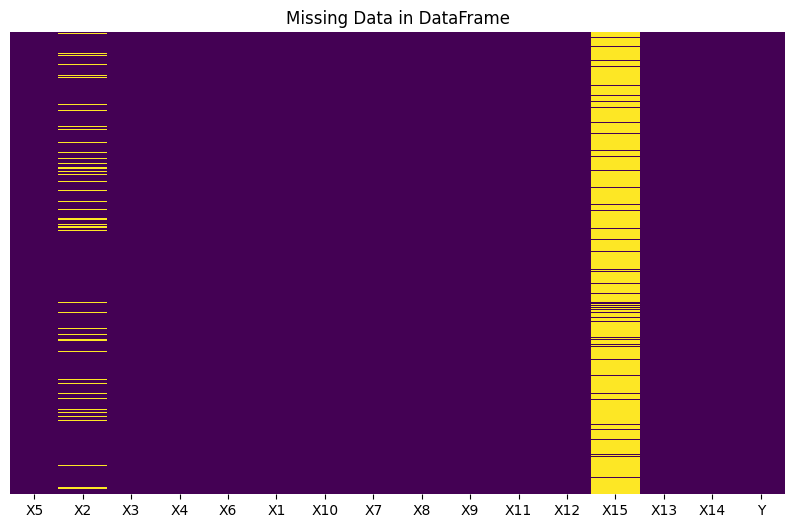

In [299]:
def display_dataframe_summary(dataframe, sort_by='Column'):
    # Select only numeric columns for calculating the sum
    numeric_df = dataframe.select_dtypes(include=[np.number])

    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Non-Null Count': dataframe.notnull().sum(),
        'Non-Null %': (100 * dataframe.notnull().sum() / len(dataframe)).map("{:.2f} %".format),
        'Dtype': dataframe.dtypes,
        'Unique Values': dataframe.nunique()
    })

    # Add a condition to check if numeric_df is not empty
    if not numeric_df.empty:
        summary['Mean'] = numeric_df.mean()

    # Extracting numerical part from column names for sorting
    summary['Sort Key'] = summary['Column'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

    # Sorting the summary DataFrame
    if sort_by == 'Column':
        summary = summary.sort_values(by='Sort Key', ascending=True)
    else:
        summary = summary.sort_values(by=sort_by, ascending=True)

    summary = summary.drop('Sort Key', axis=1)  # Remove the auxiliary sort key column

    # Display the summary
    display(summary)

    # Plotting missing data
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Data in DataFrame')
    plt.show()

# Call the function with your DataFrame
display_dataframe_summary(df, sort_by='Column')


In [300]:
classes = df["Y"].unique()
number_of_classes = df["Y"].nunique()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"The classes is: {classes}")
print(f"Number of classes: {number_of_classes}")
print(categorical_cols)

The classes is: ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']
Number of classes: 6
Index(['X15', 'X13', 'X14', 'Y'], dtype='object')


# Preprocessing the Data

In [301]:
X = df.drop(columns = ['X15', 'Y'])  # Features
y = df['Y']               # Target

X = pd.get_dummies(X, dtype="int64")
X = pd.concat([X, df['X15']], axis = 1)

In [302]:
display(X)
display(y)

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15
0,43,59.0,11,120,150,2709,2114,228,217,120,...,0,0,0,0,0,0,0,0,0,R1
1,0,54.0,7,0,693,2802,162,224,225,136,...,1,0,0,0,0,0,0,0,0,NaN
2,0,28.0,12,0,1260,2325,162,215,213,133,...,0,0,0,0,0,0,0,0,0,NaN
3,16,112.0,8,272,3649,2837,6221,235,231,128,...,0,0,0,0,0,0,0,0,0,NaN
4,10,59.0,7,134,900,2509,5184,226,226,134,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,14,NaN,18,67,918,2712,1922,201,254,183,...,0,0,0,0,0,0,0,0,0,NaN
6120,1,67.0,6,170,824,3101,1657,227,228,135,...,0,0,0,0,0,0,0,0,0,NaN
6121,-3,139.0,13,30,3127,3050,5770,240,235,123,...,0,0,0,0,0,0,0,0,0,NaN
6122,12,106.0,24,30,582,2080,108,252,202,64,...,0,0,0,0,0,0,0,0,0,NaN


0            BMW
1            BMW
2       Mercedes
3           Ford
4            BMW
          ...   
6119      Toyota
6120      Toyota
6121      Toyota
6122    Mercedes
6123      Toyota
Name: Y, Length: 6124, dtype: object

### Splitting data into Train, Val, Test.

In [303]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=7)

len(X_train), len(X_val), len(X_test)


(4286, 919, 919)

### Apply some preprocessing techniques like stander normlization using Pipepline

In [304]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



numerical_cols = X_train.select_dtypes(include='number').columns


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])



### Handling numerical missing values

In [305]:
mean = X_train['X2'].mean()

X_train['X2'] = X_train['X2'].fillna(mean)
X_val['X2'] = X_val['X2'].fillna(mean)
X_test['X2'] = X_test['X2'].fillna(mean)

print("Missing values in 'X2' column of X_train:", X_train['X2'].isnull().sum())
print("Missing values in 'X2' column of X_val:", X_val['X2'].isnull().sum())
print("Missing values in 'X2' column of X_test:", X_test['X2'].isnull().sum())


Missing values in 'X2' column of X_train: 0
Missing values in 'X2' column of X_val: 0
Missing values in 'X2' column of X_test: 0


In [306]:
X_train.shape, X_val.shape

((4286, 49), (919, 49))

### Semi-Supervised Learning Imputation (to fill categorical missing values)

**MCAR:** is the highest level of randomness and occurs where
missingness of attribute values is independent of the values

**MAR:** occurs when the probability of a case having
a missing value may depend on the known values, but not on the value of the
missing data itself

**NMAR:** occurs when the probability of a case having a missing value for an attribute could depend on the
value of that attribute.


Case and attribute removal with missing data should be applied only if
missing data are MCAR, as not MCAR missing data have non-random elements,
which can make the results biased.

In [307]:
y_train.shape, X_train.shape

((4286,), (4286, 49))

In [308]:
mask = pd.isna(X_train["X15"])

# Apply the mask to both X_train and y_train
labeled_X = X_train[~mask]
labeled_y = y_train[~mask]
labeled = pd.concat([labeled_X, labeled_y], axis=1)  # Rows where X15 is not NaN

unlabeled_X = X_train[mask]
unlabeled_y = y_train[mask]
unlabeled = pd.concat([unlabeled_X, unlabeled_y], axis=1)   # Rows where X15 is NaN


labeled = pd.get_dummies(labeled, columns = ["Y"], dtype="int64")
unlabeled = pd.get_dummies(unlabeled, columns = ["Y"], dtype="int64")

print(f"number of labeled data: {len(labeled)}, and number of features: {len(labeled.columns)}")
print(f"number of unlabeled data: {len(unlabeled)}, and number of features: {len(unlabeled.columns)}")
print(f"labeled + unlabeled: {len(labeled) + len(unlabeled)}")


number of labeled data: 423, and number of features: 55
number of unlabeled data: 3863, and number of features: 55
labeled + unlabeled: 4286


In [309]:
display(labeled.sample(1))
display(unlabeled.sample(1))

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA58,X14_ CA59,X14_ CA60,X15,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
4179,10,152.12185,26,30,3868,3108,934,219,175,75,...,0,0,0,R2,0,0,0,0,0,1


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA58,X14_ CA59,X14_ CA60,X15,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
5916,5,158.0,12,42,2008,2807,2341,233,242,138,...,0,0,0,NaN,1,0,0,0,0,0


In [310]:
X_labeled = labeled.drop('X15', axis=1)
y_labeled = labeled['X15']
X_unlabeled = unlabeled.drop('X15', axis=1)
y_unlabeled = unlabeled['X15']

print(f"X_label and Y_label length before using Semi-Supervised: {len(X_labeled)}")
print(f"Unlabeled data len: {len(X_unlabeled)}")


X_label and Y_label length before using Semi-Supervised: 423
Unlabeled data len: 3863


In [311]:
print(f"Available labels: {y_labeled.unique()}")
for label in y_labeled.unique():
    print(f"Label {label} count: {len(y_labeled[y_labeled == label])}")

Available labels: ['R1' 'R2' 'R3' 'R']
Label R1 count: 129
Label R2 count: 129
Label R3 count: 164
Label R count: 1


#### Removing R label

In [312]:
# Since we have only one sample with the value R then let us remove it

y_labeled = y_labeled[y_labeled != 'R']
X_labeled = X_labeled.loc[y_labeled.index]

print(f"Available labels: {y_labeled.unique()}")
for label in y_labeled.unique():
    print(f"Label {label} count: {len(y_labeled[y_labeled == label])}")

Available labels: ['R1' 'R2' 'R3']
Label R1 count: 129
Label R2 count: 129
Label R3 count: 164


In [313]:
X_labeled

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
584,46,359.00000,12,390,4837,3155,3022,202,219,153,...,0,0,0,0,0,0,0,0,0,1
3218,164,155.00000,15,592,2764,2798,1931,237,240,129,...,0,0,0,0,1,0,0,0,0,0
2317,60,152.12185,22,170,175,1965,722,242,193,70,...,0,0,0,0,0,0,0,1,0,0
5481,29,102.00000,16,247,2646,3359,2449,245,217,95,...,0,0,1,0,0,0,1,0,0,0
423,7,245.00000,4,30,5180,2926,3331,212,243,169,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,18,71.00000,13,124,510,2491,1434,234,214,110,...,0,0,0,0,0,0,0,1,0,0
2988,100,223.00000,19,277,2200,2852,671,191,254,194,...,0,0,0,0,1,0,0,0,0,0
4386,0,108.00000,13,0,638,2275,741,241,225,111,...,0,0,0,0,0,0,0,0,1,0
1092,55,154.00000,19,301,1592,2614,2335,239,238,122,...,0,0,0,0,0,0,0,1,0,0


In [314]:
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Initialize the MLPClassifier
clf = MLPClassifier(random_state=7, max_iter=1000, solver='adam', hidden_layer_sizes=(100,))

# Initial training
clf.fit(X_labeled, y_labeled)

while len(X_unlabeled) > 0:
    # Predict probabilities for the unlabeled batch
    probas = clf.predict_proba(X_unlabeled)
    predictions = clf.predict(X_unlabeled)

    # Find indices where model is sure
    sure_indices = [i for i, probabilities in enumerate(probas) if max(probabilities) > 0.99]

    if len(sure_indices) == 0:
        break  # Stop if no sure samples are found

    # Update labeled and unlabeled datasets
    sure_samples = X_unlabeled.iloc[sure_indices]
    sure_labels = pd.Series(predictions[sure_indices], index=sure_samples.index)

    X_labeled = pd.concat([X_labeled, sure_samples])
    y_labeled = pd.concat([y_labeled, sure_labels])

    X_unlabeled = X_unlabeled.drop(sure_samples.index)

    # Retrain the model
    clf.fit(X_labeled, y_labeled)

# Final model is trained with as much labeled data as possible
print(f"X_label and Y_label length after using Semi-Supervised: {len(X_labeled)}")
print(f"Unlabeled data len: {len(X_unlabeled)}")


X_label and Y_label length after using Semi-Supervised: 4250
Unlabeled data len: 35


In [315]:
X_test

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15
5114,43,126.00000,2,258,95,2526,1848,223,237,151,...,0,0,0,0,0,0,0,0,0,R2
3918,0,18.00000,12,0,828,2220,351,211,215,140,...,0,0,0,0,0,0,0,0,0,NaN
3076,11,123.00000,34,30,1337,2194,955,253,192,36,...,0,0,0,0,0,0,0,0,0,NaN
4602,48,152.12185,27,120,150,2716,1643,237,177,55,...,0,0,0,0,0,0,0,0,0,NaN
3997,-1,74.00000,10,30,618,2790,192,232,222,122,...,1,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,235,0.00000,15,402,1103,2417,1113,196,210,150,...,0,0,0,0,0,0,0,0,0,NaN
6076,0,63.00000,13,0,1383,2221,551,231,212,111,...,0,0,0,0,0,0,0,0,0,NaN
4882,6,152.00000,16,120,2397,2736,2329,238,239,126,...,0,0,0,0,0,0,0,0,0,NaN
2116,-3,8.00000,9,30,1385,2095,845,210,223,150,...,0,0,0,0,0,0,0,0,0,NaN


#### Updating X_train, X_val, and X_test with the new X15 column

In [316]:
def process_data(X, y, clf, feature_name):
    # Mask for missing values in the specified feature
    mask = pd.isna(X[feature_name])

    # Labeled Data
    labeled_X = X[~mask]
    labeled_y = y[~mask].to_frame(name='Y')
    labeled_y = pd.get_dummies(labeled_y,  dtype="int64")
    labeled = pd.concat([labeled_X, labeled_y], axis=1)

    # Unlabeled Data
    unlabeled_X = X[mask]
    unlabeled_y = y[mask].to_frame(name='Y')
    unlabeled_y = pd.get_dummies(unlabeled_y, dtype="int64")

    unlabeled = pd.concat([unlabeled_X, unlabeled_y], axis=1)
    X_unlabeled = unlabeled.drop(feature_name, axis=1)

    # Predict and fill missing values
    X.loc[mask, feature_name] = clf.predict(X_unlabeled)


    return labeled, unlabeled

# Process training data
columns_to_drop = ['Y_BMW', 'Y_Ford', 'Y_GMC', 'Y_Honda', 'Y_Mercedes', 'Y_Toyota']
X_labeled = X_labeled.drop(columns=columns_to_drop, axis=1)
X_train = pd.concat([X_labeled, y_labeled.to_frame(name='X15')], axis = 1)
y_train = y_train.loc[X_train.index]

# Process validation data
val_labeled, val_unlabeled = process_data(X_val, y_val, clf, 'X15')

# Process testing data
test_labeled, test_unlabeled = process_data(X_test, y_test, clf, 'X15')

# Print lengths
print(f"number of train labeled data: {len(X_labeled)}")
print(f"number of val labeled data: {len(val_labeled)}")
print(f"number of test labeled data: {len(test_labeled)}")


number of train labeled data: 4250
number of val labeled data: 96
number of test labeled data: 82


In [317]:
X_train

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15
584,46,359.00000,12,390,4837,3155,3022,202,219,153,...,1,0,0,0,0,0,0,0,0,R1
3218,164,155.00000,15,592,2764,2798,1931,237,240,129,...,0,0,0,0,0,0,0,0,0,R1
2317,60,152.12185,22,170,175,1965,722,242,193,70,...,0,0,0,0,0,0,0,0,0,R2
5481,29,102.00000,16,247,2646,3359,2449,245,217,95,...,0,0,0,0,0,0,0,1,0,R1
423,7,245.00000,4,30,5180,2926,3331,212,243,169,...,0,0,0,0,0,0,0,0,0,R1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,76,102.00000,30,150,150,2707,765,253,187,40,...,1,0,0,0,0,0,0,0,0,R2
2859,-2,152.12185,26,30,870,2195,904,221,176,74,...,0,0,0,0,0,0,0,0,0,R1
4263,197,312.00000,22,285,376,2611,966,155,218,201,...,0,0,0,0,0,0,0,0,0,R2
1676,107,61.00000,24,255,258,2764,834,231,183,72,...,1,0,0,0,0,0,0,0,0,R3


In [318]:
X_train = pd.get_dummies(X_train, columns = ["X15"],  dtype="int64")
X_val = pd.get_dummies(X_val, columns = ["X15"],  dtype="int64")
X_test = pd.get_dummies(X_test, columns = ["X15"],  dtype="int64")

In [319]:
X_train.shape, X_val.shape, X_test.shape

((4250, 51), (919, 51), (919, 51))

In [320]:
X_test

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15_R1,X15_R2,X15_R3
5114,43,126.00000,2,258,95,2526,1848,223,237,151,...,0,0,0,0,0,0,0,0,1,0
3918,0,18.00000,12,0,828,2220,351,211,215,140,...,0,0,0,0,0,0,0,0,1,0
3076,11,123.00000,34,30,1337,2194,955,253,192,36,...,0,0,0,0,0,0,0,0,0,1
4602,48,152.12185,27,120,150,2716,1643,237,177,55,...,0,0,0,0,0,0,0,0,1,0
3997,-1,74.00000,10,30,618,2790,192,232,222,122,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,235,0.00000,15,402,1103,2417,1113,196,210,150,...,0,0,0,0,0,0,0,0,0,1
6076,0,63.00000,13,0,1383,2221,551,231,212,111,...,0,0,0,0,0,0,0,0,1,0
4882,6,152.00000,16,120,2397,2736,2329,238,239,126,...,0,0,0,0,0,0,0,0,0,1
2116,-3,8.00000,9,30,1385,2095,845,210,223,150,...,0,0,0,0,0,0,0,0,0,1


### Applying the pipeline

In [321]:
selected_columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12"]  # The columns to transform
transformed_train = pipeline.fit_transform(X_train[selected_columns])

transformed_train_df = pd.DataFrame(transformed_train, index=X_train.index, columns=selected_columns)
X_train = pd.concat([transformed_train_df, X_train.drop(columns=selected_columns)], axis=1)

transformed_val = pipeline.transform(X_val[selected_columns])
transformed_test = pipeline.transform(X_test[selected_columns])

transformed_val_df = pd.DataFrame(transformed_val, index=X_val.index, columns=selected_columns)
X_val = pd.concat([transformed_val_df, X_val.drop(columns=selected_columns)], axis=1)

transformed_test_df = pd.DataFrame(transformed_test, index=X_test.index, columns=selected_columns)
X_test = pd.concat([transformed_test_df, X_test.drop(columns=selected_columns)], axis=1)

In [322]:
X_train["X12"].std()

1.0001176678241408

In [323]:
print(f"Length train (X, y): {(len(X_train), len(y_train))}")
print(f"Length val (X, y): {(len(X_val), len(y_val))}")
print(f"Length test (X, y): {(len(X_test), len(y_test))}")

Length train (X, y): (4250, 4250)
Length val (X, y): (919, 919)
Length test (X, y): (919, 919)


In [324]:
y_train.shape

(4250,)

In [325]:
# Verify and reset index for training data
if not X_train.index.equals(y_train.index):
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)

# Verify and reset index for validation data
if not X_val.index.equals(y_val.index):
    X_val.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
val_data = pd.concat([X_val, y_val], axis=1)

# Verify and reset index for test data
if not X_test.index.equals(y_test.index):
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
test_data = pd.concat([X_test, y_test], axis=1)


assert all(X_train.index == y_train.index), "Indexes of X_train and y_train do not match."
assert all(X_val.index == y_val.index), "Indexes of X_val and y_val do not match."
assert all(X_test.index == y_test.index), "Indexes of X_test and y_test do not match."



In [326]:
directory = "preprocessed_data"

if not os.path.exists(directory):
    os.makedirs(directory)

train_data.to_csv(working_on + '/preprocessed_data/train_data.csv', index=False)
val_data.to_csv(working_on + '/preprocessed_data/val_data.csv', index=False)
test_data.to_csv(working_on + '/preprocessed_data/test_data.csv', index=False)

In [327]:
train_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15_R1,X15_R2,X15_R3,Y
584,1.290226,2.112607,-0.522884,1.115542,-0.016684,2.512688,-0.497937,-0.005048,0.484781,1.378068,...,0,0,0,0,0,0,1,0,0,Toyota
3218,0.380248,0.028934,-0.188861,2.250045,2.066725,0.924807,0.664973,0.888840,-0.010940,0.422940,...,0,0,0,0,0,0,1,0,0,BMW
2317,-1.743034,-0.000464,0.590527,-0.120055,0.230500,-1.058322,0.831103,-1.111766,-1.229588,-0.635492,...,0,0,0,0,0,0,0,1,0,Honda
5481,1.810213,-0.512413,-0.077520,0.312404,-0.316836,0.834421,0.930781,-0.090180,-0.713212,0.876429,...,0,0,0,0,1,0,1,0,0,GMC
423,0.706515,0.948202,-1.413614,-0.906344,-0.705268,2.775420,-0.165677,1.016538,0.815262,1.648586,...,0,0,0,0,0,0,1,0,0,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,0.148293,-0.512413,1.481257,-0.232382,0.512996,-1.077472,1.196589,-1.367163,-1.849240,-0.597848,...,0,0,0,0,0,0,0,1,0,BMW
2859,-1.156773,-0.000464,1.035892,-0.906344,-0.864172,-0.525964,0.133357,-1.835390,-1.146968,-0.476159,...,0,0,0,0,0,0,1,0,0,Mercedes
4263,-0.096407,1.632545,0.590527,0.525825,2.649373,-0.904359,-2.059558,-0.047614,1.476224,-0.421880,...,0,0,0,0,0,0,0,1,0,Honda
1676,0.293584,-0.931190,0.813210,0.357335,1.060332,-0.994745,0.465617,-1.537427,-1.188278,-0.537441,...,0,0,0,0,0,0,0,0,1,BMW
